# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

# Load Dataset

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.shape

(807, 14)

**Task**: Perform polishing and cleaning steps for the following multivariate plot, where the relationship between height and weight are depicted for the Fairy and Dragon Pokémon types. You'll need to do more than just add meaningful labels and titles to the plot. Pay attention to the interpretability of tick marks and the ability to associate each point to a type of Pokemon.

For reference, height is in terms of meters and weight is in terms of kilograms. One other thing you might try is to change the colors mapped to each type to match those given by the game series. Fairy is depicted with a light pink (hex code #ee99ac) while Dragon is associated with a medium purple (hex code #7038f8). (Type colors taken from [Pokémon Wiki Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates).)

In [5]:
type_cols = ['type_1','type_2']
non_type_cols = df.columns.difference(type_cols)
pkmn_types = df.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

''

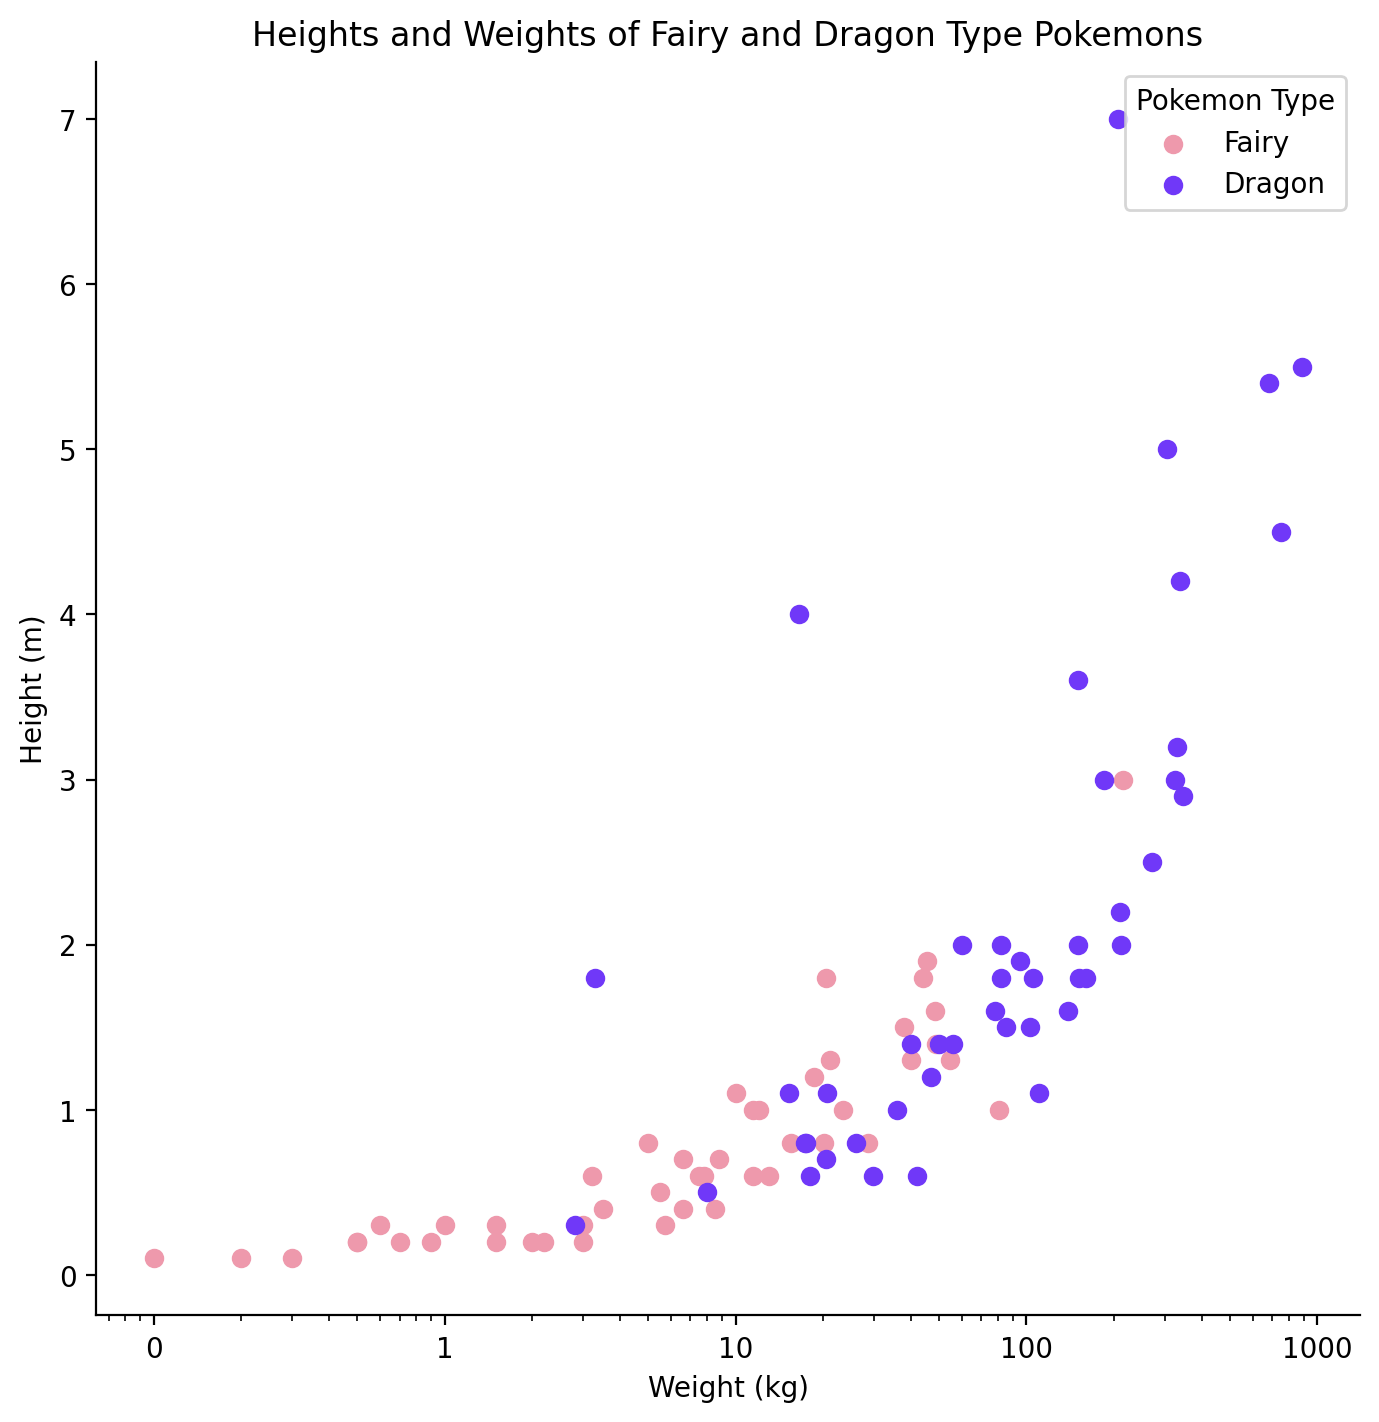

In [41]:
# MODIFY THIS CODE
import matplotlib.ticker as tkr

colors = {'color' : ['#ee99ac', '#7038f8']} #First one is light pink for fairy, second is purple for dragon

g = sns.FacetGrid(data = pokemon_sub, hue_kws=colors, hue = 'type', height =7)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')

plt.title("Heights and Weights of Fairy and Dragon Type Pokemons")

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,p: f'{int(y):d}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,p: f'{int(x):d}'))

plt.xlabel("Weight (kg)")
plt.ylabel('Height (m)')

plt.legend(['Fairy','Dragon'],title="Pokemon Type")
;

# Solution

I created labels to the individual axes, including units of measurement. I also added a descriptive title for the plot. On the x-axis, I've changed the default tick marks to be plain numbers, using a 1-3-10 scheme. Finally, I've added a legend to the plot to associate each point to a Pokemon type. To set up the custom colors, I added a 'palette' argument to the FacetGrid call, pointing to a dictionary associating each type to a color. The legend was added using matplotlib, so that the Pokemon types could be capitalized.


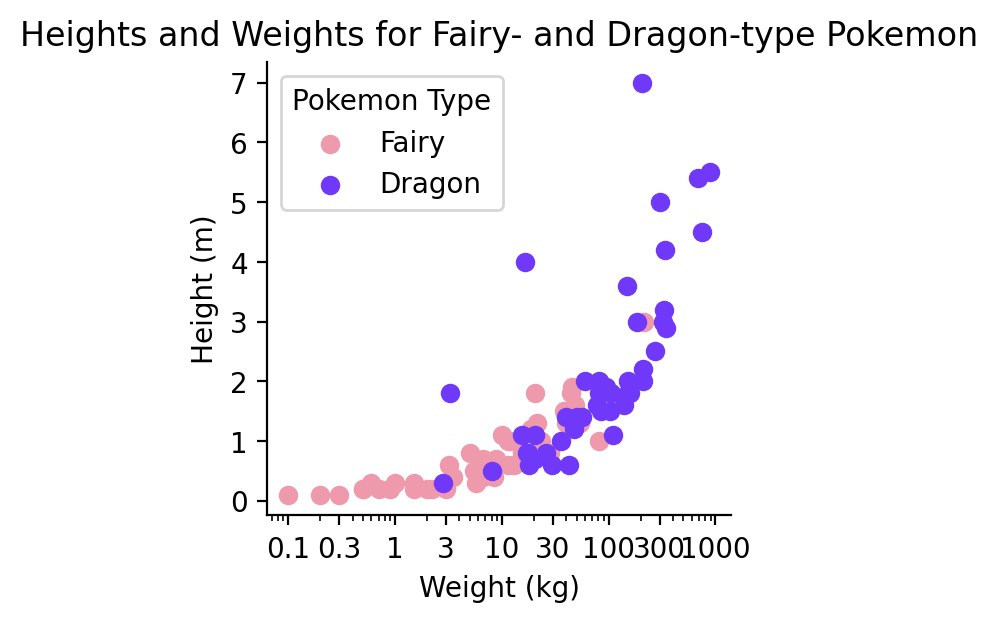

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

def polishing_solution_1():
    """
    Solution for Question 1 in polishing plots practice: clean up and polish a
    plot depicting the relationship between height and weight for two different
    types of Pokemon.
    """
    sol_string = ["I created labels to the individual axes, including units of",
                  "measurement. I also added a descriptive title for the plot.",
                  "On the x-axis, I've changed the default tick marks to be",
                  "plain numbers, using a 1-3-10 scheme. Finally, I've added a",
                  "legend to the plot to associate each point to a Pokemon type.",
                  "To set up the custom colors, I added a 'palette' argument to",
                  "the FacetGrid call, pointing to a dictionary associating each",
                  "type to a color. The legend was added using matplotlib, so",
                  "that the Pokemon types could be capitalized."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./pokemon.csv')

    type_cols = ['type_1','type_2']
    non_type_cols = pokemon.columns.difference(type_cols)
    pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols,
                              var_name = 'type_level', value_name = 'type').dropna()
    pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

    # set up a dictionary to map types to colors
    type_colors = {'fairy': '#ee99ac', 'dragon': '#7038f8'}

    # plotting
    g = sb.FacetGrid(data = pokemon_sub, hue = 'type', palette = type_colors)
    g.map(plt.scatter, 'weight','height')
    g.set(xscale = 'log') # need to set scaling before customizing ticks
    x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    g.set(xticks = x_ticks, xticklabels = x_ticks)

    # add labels and titles
    g.set_xlabels('Weight (kg)')
    g.set_ylabels('Height (m)')
    plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon')
    plt.legend(['Fairy', 'Dragon'], title = 'Pokemon Type')

polishing_solution_1()